# 牛牛算法分析

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
number=5
chang=5
sum_money=80
avg_money=sum_money/float(number-1)

In [3]:
def qushu():
    s=[]
    number5=5*number
    while(len(s)<number5):
        u=np.random.randint(0,52)
        if u not in s:
            s.append(u)
    tag=np.zeros(number)
    for i in range(number):
        st=5*i
        en=5*(i+1)
        tag[i]=max(s[st:en])
    s=np.array(s)
    zhi=np.zeros(number5)
    zhi=s/4+1
    for i in range(number5):
        if zhi[i]>=10:
            zhi[i]=0
    return s, tag, zhi

In [4]:
def niuniu(y):
    tagg1=0
    up=((y[0]+y[1]+y[2])%10==0 or (y[0]+y[1]+y[3])%10==0 or (y[0]+y[1]+y[4])%10==0 or (y[0]+y[2]+y[3])%10==0 or (y[0]+y[2]+y[4])%10==0
        or (y[0]+y[3]+y[4])%10==0 or (y[1]+y[2]+y[3])%10==0 or (y[1]+y[2]+y[4])%10==0 or (y[1]+y[3]+y[4])%10==0 or (y[2]+y[3]+y[4])%10==0)
    if up:
        if sum(y)%10==0:
            tagg1=10
        else:
            tagg1=sum(y)%10
    return tagg1

In [5]:
def jifen(tagg, tag):
    yuanfen=np.zeros(number)
    yuanfen[1:number]=avg_money
    taggg=tagg*100+tag
    num=taggg.argsort()
    un=num.argmin()
    if taggg[0]<800:
        for i in range(un):
            yuanfen[0]=yuanfen[0]+yuanfen[num[i]]
        while un<number-1:
            if taggg[num[un+1]]<800:
                yuanfen[0]=yuanfen[0]-yuanfen[num[un+1]]
            elif taggg[num[un+1]]>800 and taggg[num[un+1]]<1000:
                yuanfen[0]=yuanfen[0]-yuanfen[num[un+1]]*2
            else:
                yuanfen[0]=yuanfen[0]-yuanfen[num[un+1]]*3
            un=un+1
#        print 'haha'
    elif taggg[0]<1000:
        for i in range(un):
            yuanfen[0]=yuanfen[0]+yuanfen[num[i]]*2
        while un<number-1:
            if taggg[num[un+1]]<1000:
                yuanfen[0]=yuanfen[0]-yuanfen[num[un+1]]*2
            else:
                yuanfen[0]=yuanfen[0]-yuanfen[num[un+1]]*3
            un=un+1 
#        print 'hahaha'
    else:
        for i in range(un):
            yuanfen[0]=yuanfen[0]+yuanfen[num[i]]*3
        while un<number-1:
            yuanfen[0]=yuanfen[0]-yuanfen[num[un+1]]*3
            un=un+1 
#        print 'ha'
#    print taggg
    return yuanfen[0]

In [6]:
def dubo(chang):
    money=0
#    avg_money=sum_money/float(number-1)    #因为avg_money在函数计分中出现了，所以avg_money必须是全局变量，或者带到函数里面去
#    for j in range(chang1):   #chang1是可以的，因为chang1是全局变量。chang2不行
    for j in range(chang):
        s, tag, zhi=qushu()
        tagg=np.zeros(number)
        for i in range(number):
            st=5*i
            en=5*(i+1)
            tagg[i]=niuniu(zhi[st:en])
        zhuang=jifen(tagg,tag)
        money=money+zhuang
    return money

In [7]:
money=dubo(chang)
money

220.0

### 分析与平均下钱的关系

In [8]:
number=5
chang=1000
#sum_money=80
#avg_money=sum_money/float(number-1)

In [9]:
money=np.zeros(5)
for m in range(5):
    avg_money=(m+1)*10
    money[m]=dubo(chang)/float(chang)
money    

array([ 1.01,  4.1 ,  3.63, -3.64,  1.25])

### 分析庄家胜负的均数

In [10]:
number=5
chang=1000
sum_money=80
avg_money=sum_money/float(number-1)
money=np.zeros(100)

In [11]:
def junshu(size):
    return dubo(chang)/chang

<IPython.core.display.Javascript object>


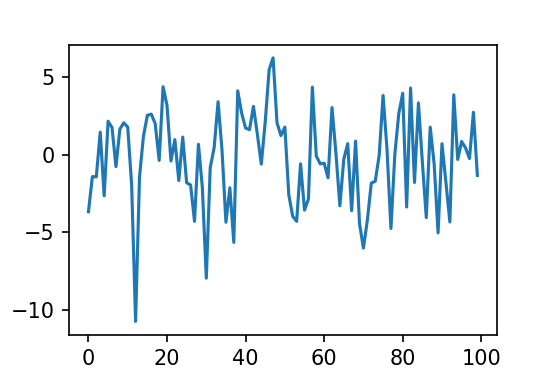

In [12]:
for size in range(100):
    money[size]=junshu(size)
plt.plot(money)

### 函数迭代参数分析

In [47]:
def fenxi(chang1):
    chang2=chang1
    money=dubo(chang1)
    return money

In [48]:
for chang1 in range(5,10):
    money=fenxi(chang1)
money               #共有35个print taggg的结果，代表chang取值5，6，7，8，9。但最后输出的money是chang取9的值
#说明在函数fenxi(chang)中chang可以作为其中的变量迭代进fenxi中涉及到的其他函数。但在fenxi中定义的变量如果不带入其他函数的括号里的话，则不能在其他函数中引用

#即如果不是全局变量，则一个函数要想使用所在函数内定义的变量，只能将其放入()内

[  26.  949.  143.  751.  840.]
[  43.  434.   42.  241.  945.]
[ 449.   43.   47.   51.   45.]
[   49.   745.  1032.    48.  1037.]
[  44.   28.  847.  145.  142.]
[ 637.  951.  345.   41.  242.]
[ 551.  448.  845.  746.  940.]
[ 851.  349.  950.   48.  134.]
[  46.  441.  629.  747.  843.]
[ 936.  548.   33.  450.  742.]
[   28.   939.   231.  1051.   250.]
[  945.    51.   135.  1048.    49.]
[ 842.  650.  544.  746.  751.]
[ 420.   51.  131.  641.  147.]
[ 640.  831.   50.   41.   45.]
[   45.    49.    48.   641.  1044.]
[  51.  827.   42.  832.  147.]
[ 947.  351.  348.  740.   45.]
[ 247.  134.  627.   36.  646.]
[  942.    50.   344.  1034.    24.]
[ 431.   51.   38.  845.   40.]
[ 547.   51.  939.   48.  141.]
[ 251.  950.  148.  536.   43.]
[ 546.  148.  550.  334.  742.]
[ 1051.    50.   838.   733.   949.]
[   48.  1045.   151.   238.   246.]
[  850.   541.   147.  1046.    38.]
[  44.  350.   45.  549.  540.]
[  39.  549.  440.   37.  341.]
[ 1047.    38.   636.   143.   1

120.0

## 调试程序

In [55]:
    yuanfen=[0,20,20,20,20]
    taggg=np.array([920,51,1042,942,38])
    num=taggg.argsort()
    un=num.argmin()
    if taggg[0]<800:
        for i in range(un):
            yuanfen[0]=yuanfen[0]+yuanfen[num[i]]
        while un<number-1:
            if taggg[num[un+1]]<800:
                yuanfen[0]=yuanfen[0]-yuanfen[num[un+1]]
            elif taggg[num[un+1]]>800 and taggg[num[un+1]]<1000:
                yuanfen[0]=yuanfen[0]-yuanfen[num[un+1]]*2
            else:
                yuanfen[0]=yuanfen[0]-yuanfen[num[un+1]]*3
            un=un+1
        print 'haha'
    elif taggg[0]<1000:
        for i in range(un):
            yuanfen[0]=yuanfen[0]+yuanfen[num[i]]*2
        while un<number-1:
            if taggg[num[un+1]]<1000:
                yuanfen[0]=yuanfen[0]-yuanfen[num[un+1]]*2
            else:
                yuanfen[0]=yuanfen[0]-yuanfen[num[un+1]]*3
            un=un+1    
        print 'hahaha'
    else:
        for i in range(un):
            yuanfen[0]=yuanfen[0]+yuanfen[num[i]]*3
        while un<number-1:
            yuanfen[0]=yuanfen[0]-yuanfen[num[un+1]]*3
            un=un+1 
        print 'ha'
    print yuanfen[0]

hahaha
-20
